In [148]:
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
#from pyclustering.samples.definitions import FCPS_SAMPLES
#from pyclustering.utils import read_sample;
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

import numpy as np # linear algebra

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd

Using TensorFlow backend.


In [40]:
import scipy.io
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
atom = scipy.io.loadmat('FCPS/Atom.mat')
chain = scipy.io.loadmat('FCPS/Chainlink.mat')
engy = scipy.io.loadmat('FCPS/EngyTime.mat')
hepta = scipy.io.loadmat('FCPS/Hepta.mat')
target = scipy.io.loadmat('FCPS/Target.mat')
tetra = scipy.io.loadmat('FCPS/Tetra.mat')
lsun = scipy.io.loadmat('FCPS/Lsun.mat')
twoDiamons = scipy.io.loadmat('FCPS/TwoDiamonds.mat')
wingNut = scipy.io.loadmat('FCPS/WingNut.mat')

In [128]:
isomap = Isomap(n_components=2).fit_transform(atom['fea'])
pca = PCA(n_components=2).fit_transform(atom['fea'])
mds = MDS(n_components=2).fit_transform(atom['fea'])
lle = LocallyLinearEmbedding(n_components=2,eigen_solver='dense').fit_transform(atom['fea'])
eigen = method = LocallyLinearEmbedding(n_components=2,  n_neighbors=20, method='hessian', eigen_solver='dense').fit_transform(atom['fea'])

In [150]:
atom_s = minmax_scale(atom['fea'], axis = 0)

In [208]:
input_dim = Input(shape = (3, ))
encoded1 = Dense(2, activation = 'relu')(input_dim)
decoded1 = Dense(3, activation = 'sigmoid')(encoded1)
autoencoder = Model(inputs = input_dim, outputs = decoded1)

# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

autoencoder.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [221]:
autoencoder.fit(atom_s, atom_s, epochs = 100, batch_size = 20, shuffle = False)

Epoch 1/100
800/800 [==============================] - 0s 110us/step - loss: 0.6229
Epoch 2/100
800/800 [==============================] - 0s 89us/step - loss: 0.6229
Epoch 3/100
800/800 [==============================] - 0s 83us/step - loss: 0.6229
Epoch 4/100
800/800 [==============================] - 0s 83us/step - loss: 0.6229
Epoch 5/100
800/800 [==============================] - 0s 66us/step - loss: 0.6229
Epoch 6/100
800/800 [==============================] - 0s 61us/step - loss: 0.6229
Epoch 7/100
800/800 [==============================] - 0s 59us/step - loss: 0.6229
Epoch 8/100
800/800 [==============================] - 0s 64us/step - loss: 0.6229
Epoch 9/100
800/800 [==============================] - 0s 59us/step - loss: 0.6229
Epoch 10/100
800/800 [==============================] - 0s 62us/step - loss: 0.6229
Epoch 11/100
800/800 [==============================] - 0s 61us/step - loss: 0.6229
Epoch 12/100
800/800 [==============================] - 0s 62us/step - loss: 0.6229


800/800 [==============================] - 0s 80us/step - loss: 0.6229
Epoch 99/100
800/800 [==============================] - 0s 81us/step - loss: 0.6229
Epoch 100/100
800/800 [==============================] - 0s 78us/step - loss: 0.6229


In [222]:
encoder = Model(inputs = input_dim, outputs = encoded1)
encoded_input = Input(shape = (2, ))

encoded_train = pd.DataFrame(encoder.predict(atom_s))
encoded_train = encoded_train.add_prefix('feature_')

Text(0.5, 1.0, 'Deep AE on Atom')

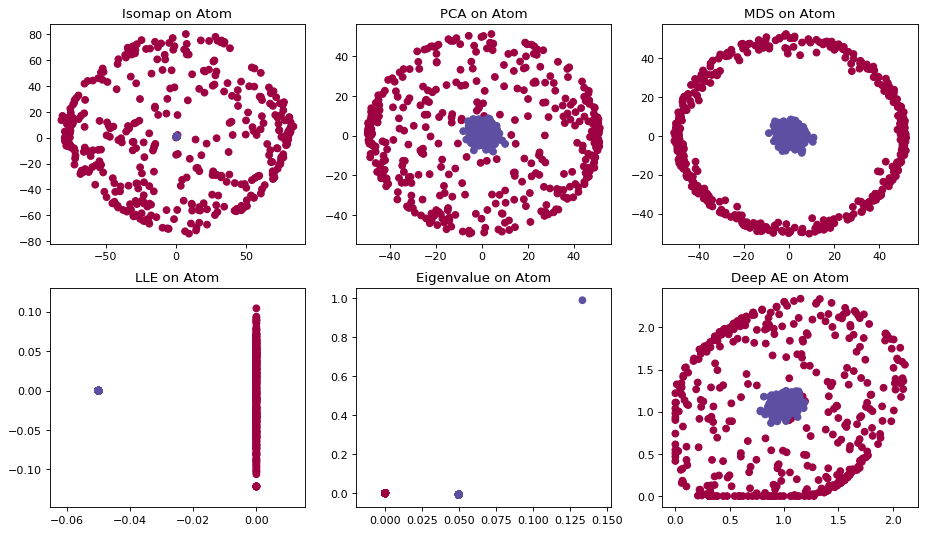

In [223]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = atom['gnd'][:,0]
## Isomap
subplot(2, 3, 1)
scatter(isomap[:,0], isomap[:,1], c=color, cmap=plt.cm.Spectral)
title('Isomap on Atom')
## PCA
subplot(2, 3, 2)
scatter(pca[:,0], pca[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Atom')
## MDS
subplot(2, 3, 3)
scatter(mds[:,0], mds[:,1], c=color, cmap=plt.cm.Spectral)
title('MDS on Atom')
## LLE
subplot(2, 3, 4)
scatter(lle[:,0], lle[:,1], c=color, cmap=plt.cm.Spectral)
title('LLE on Atom')
## Eigenvalue
subplot(2, 3, 5)
scatter(eigen[:,0], eigen[:,1], c=color, cmap=plt.cm.Spectral)
title('Eigenvalue on Atom')
##
subplot(2, 3, 6)
scatter(encoded_train.feature_0, encoded_train.feature_1, c=color, cmap=plt.cm.Spectral)
title('Deep AE on Atom')